In [30]:
#Name Laakshit D
#Reg no: 212222230071

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv2.imread('CoinsA.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

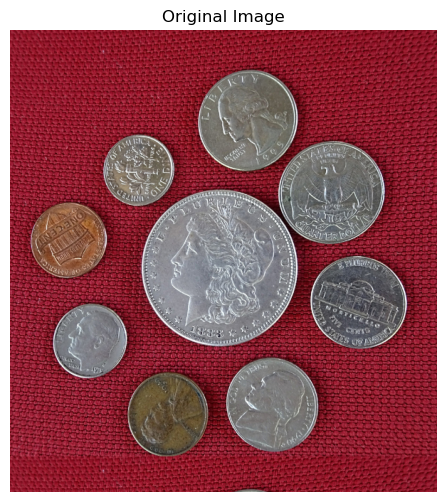

In [32]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis("off")


In [33]:
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

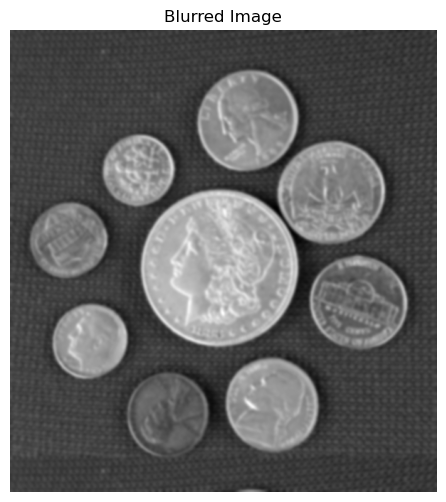

In [34]:
plt.figure(figsize=(6, 6))
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis("off")

In [35]:
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    21,
    10  
)

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

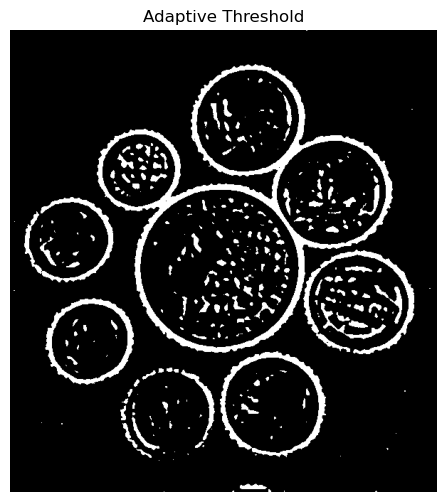

In [36]:
plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Adaptive Threshold')
plt.axis("off")

In [37]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

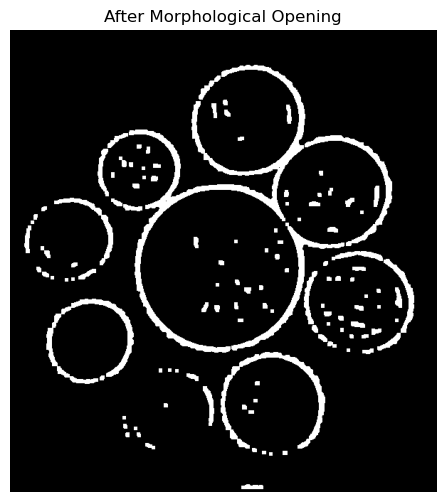

In [38]:
plt.figure(figsize=(6, 6))
plt.imshow(opening, cmap='gray')
plt.title('After Morphological Opening')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

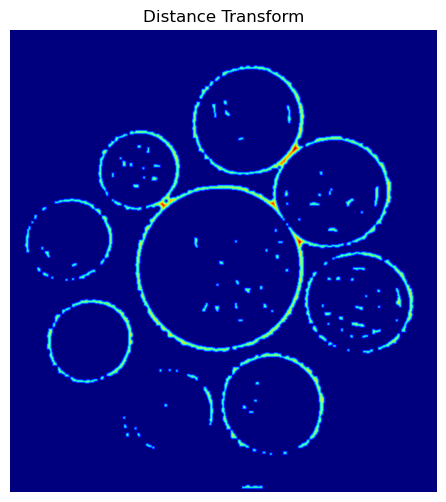

In [39]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

plt.figure(figsize=(6, 6))
plt.imshow(dist_transform, cmap='jet')
plt.title('Distance Transform')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

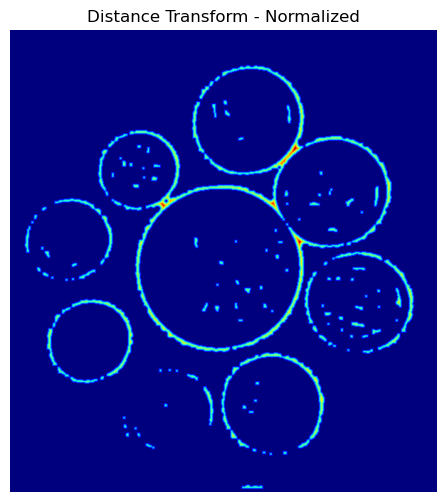

In [40]:
dist_norm = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
dist_norm_uint8 = dist_norm.astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(dist_norm_uint8, cmap='jet')
plt.title('Distance Transform - Normalized')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

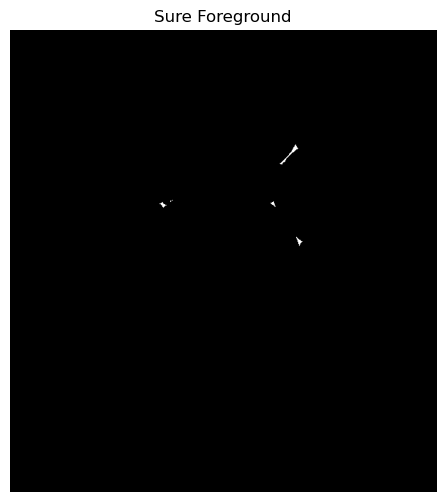

In [41]:
ret, sure_fg = cv2.threshold(dist_norm_uint8, 180, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

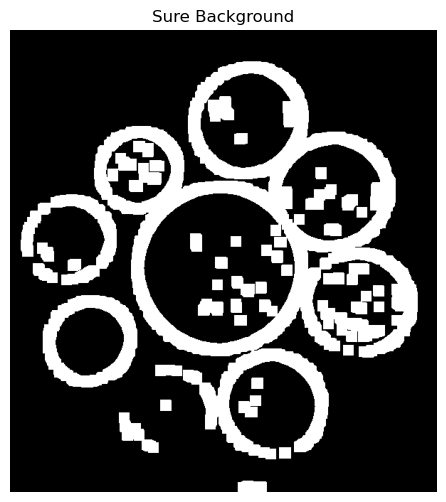

In [42]:
sure_bg = cv2.dilate(opening, kernel, iterations=5)

plt.figure(figsize=(6, 6))
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

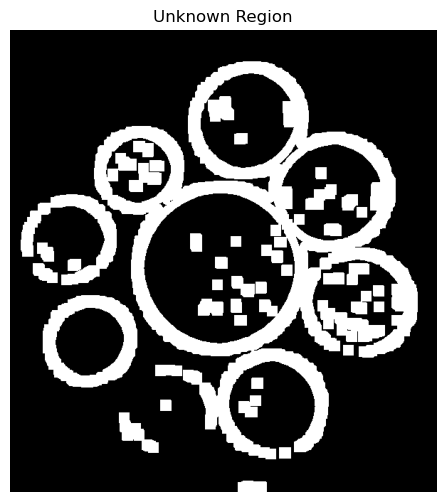

In [43]:
unknown = cv2.subtract(sure_bg, sure_fg)

plt.figure(figsize=(6, 6))
plt.imshow(unknown, cmap='gray')
plt.title('Unknown Region')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

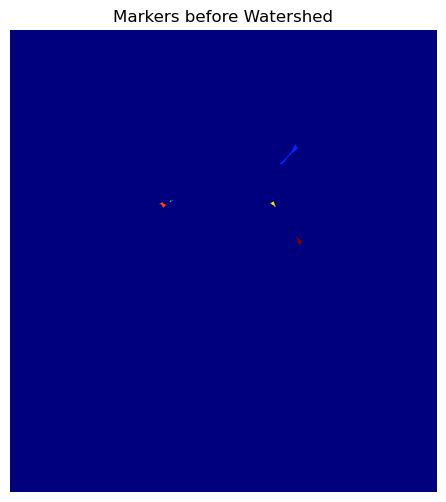

In [44]:
ret, markers = cv2.connectedComponents(sure_fg)

plt.figure(figsize=(6, 6))
plt.imshow(markers, cmap='jet')
plt.title('Markers before Watershed')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

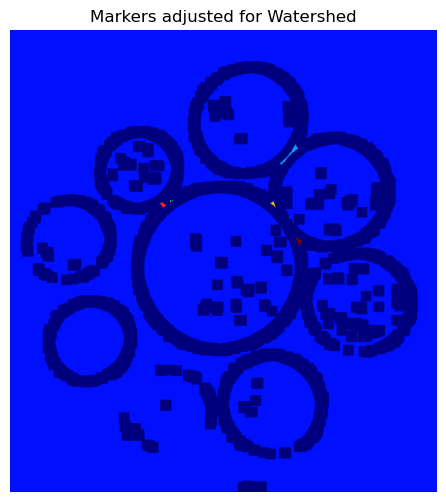

In [45]:
markers = markers + 1
markers[unknown == 255] = 0

plt.figure(figsize=(6, 6))
plt.imshow(markers, cmap='jet')
plt.title('Markers adjusted for Watershed')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

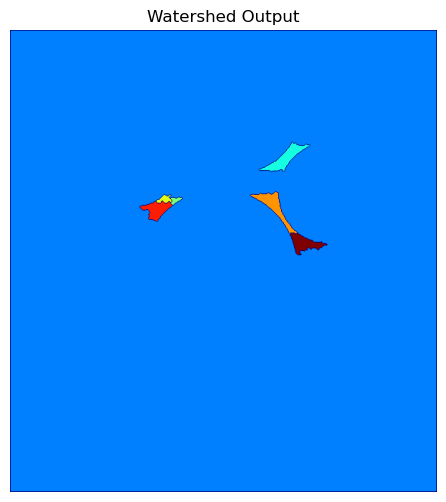

In [46]:
img_watershed = img.copy()
markers_ws = cv2.watershed(img_watershed, markers)

plt.figure(figsize=(6, 6))
plt.imshow(markers_ws, cmap='jet')
plt.title('Watershed Output')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

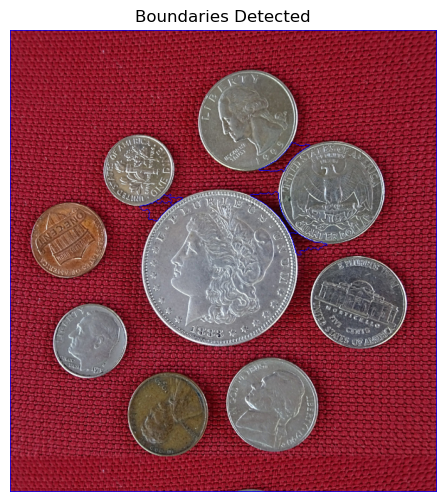

In [47]:
img_boundaries = img.copy()
img_boundaries[markers_ws == -1] = [255, 0, 0]  # Red lines

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_boundaries, cv2.COLOR_BGR2RGB))
plt.title('Boundaries Detected')
plt.axis("off")

In [48]:
unique_markers = np.unique(markers_ws)
unique_markers = unique_markers[(unique_markers != -1) & (unique_markers != 1)]
num_coins = len(unique_markers)

print("Estimated number of coins:", num_coins)

Estimated number of coins: 6


(np.float64(-0.5), np.float64(599.5), np.float64(649.5), np.float64(-0.5))

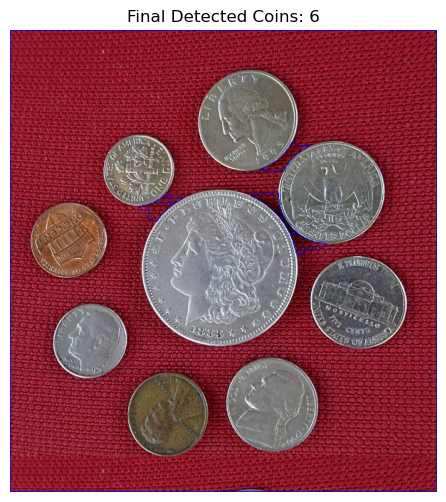

In [49]:
# Display result
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_boundaries, cv2.COLOR_BGR2RGB))
plt.title(f'Final Detected Coins: {num_coins}')
plt.axis('off')

In [50]:
# Simple blob detection approach
img_blur = cv2.GaussianBlur(gray, (11, 11), 0)
ret, thresh2 = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)

In [51]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 500

In [52]:
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(thresh2)

In [53]:
img_keypoints = cv2.drawKeypoints(
    img,
    keypoints,
    np.array([]),
    (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

Number of coins detected: 0


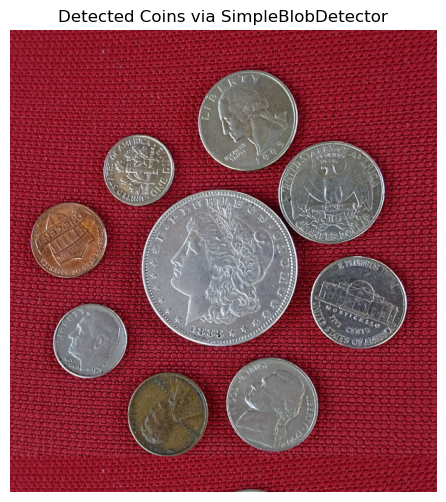

In [54]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Detected Coins via SimpleBlobDetector")
plt.axis("off")

print(f"Number of coins detected: {len(keypoints)}")

Contours detected: 1


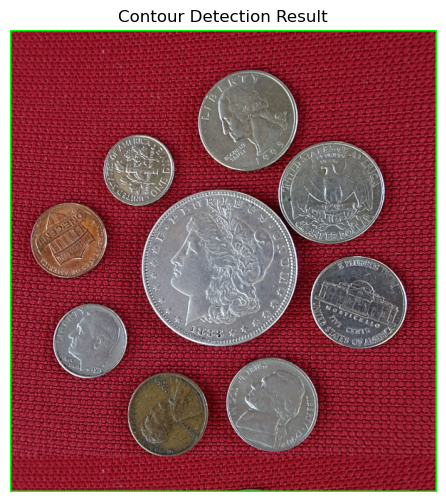

In [55]:
# --- CONTOUR DETECTION ---
gray_blur = cv2.GaussianBlur(gray, (11, 11), 0)
ret, thresh_contour = cv2.threshold(gray_blur, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, hierarchy = cv2.findContours(
    thresh_contour,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

# Draw contours
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Contour Detection Result")
plt.axis("off")

print("Contours detected:", len(contours))
